# 09_05: A taste of machine learning

In [1]:
import math
import collections
import dataclasses
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# fix random number seed for repeatable computation
np.random.seed(43)

In [4]:
gm = pd.read_csv('gapminder.csv')

In [5]:
gm2023 = gm[gm.year == 2023]
gm2023.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita
207,Afghanistan,2023,Asia,41500000.0,64.0,94.760,4.84,1400.0
431,Albania,2023,Europe,2810000.0,77.3,99.199,1.35,16100.0
655,Algeria,2023,Africa,46200000.0,77.1,97.960,2.77,11400.0
866,Andorra,2023,Europe,80900.0,82.9,99.723,1.08,55700.0
1090,Angola,2023,Africa,36700000.0,65.9,93.300,5.12,5810.0


In [23]:
x = gm2023[['population', 'life_expectancy', 'age5_surviving', 'babies_per_woman', 'gdp_per_capita']]
x

,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita
207,41500000.0,64.0,94.760,4.84,1400.0
431,2810000.0,77.3,99.199,1.35,16100.0
655,46200000.0,77.1,97.960,2.77,11400.0
866,80900.0,82.9,99.723,1.08,55700.0
1090,36700000.0,65.9,93.300,5.12,5810.0
...,...,...,...,...,...
40968,28300000.0,75.8,97.620,2.08,6760.0
41191,100000000.0,75.1,98.100,1.91,11800.0
41389,39400000.0,67.2,94.720,4.59,1720.0
41613,20700000.0,63.4,94.990,4.10,3320.0


In [7]:
y = gm2023['region'].astype('category')

In [8]:
z = y.cat.codes
z.head(10)

207     2
431     3
655     0
866     3
1090    0
1314    1
1538    1
1762    2
1986    4
2210    3
dtype: int8

In [9]:
x_train, x_test, z_train, z_test = train_test_split(x, z, test_size=0.3)

In [10]:
tree = DecisionTreeClassifier()

In [11]:
tree.fit(x_train, z_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [12]:
tree_pred = tree.predict(x_test)
tree_pred

array([0, 2, 2, 2, 3, 0, 1, 1, 0, 3, 0, 2, 2, 0, 1, 3, 2, 0, 2, 2, 0, 0,
       0, 0, 1, 0, 0, 1, 2, 0, 0, 1, 3, 3, 0, 0, 3, 2, 3, 1, 2, 2, 3, 0,
       0, 3, 0, 2, 0, 0, 0, 4, 3, 3, 0, 0, 3, 2, 3], dtype=int8)

In [13]:
pd.DataFrame({'label': y.cat.categories[z_test],
              'predicted': y.cat.categories[tree_pred]}).head(20)

,label,predicted
0,Africa,Africa
1,Europe,Asia
2,Asia,Asia
3,Africa,Asia
4,Europe,Europe
5,Africa,Africa
6,Asia,America
7,America,America
8,Africa,Africa
9,America,Europe


In [14]:
accuracy_score(z_test, tree_pred)

0.6949152542372882

In [15]:
np.sum(y.cat.categories[z_test] == y.cat.categories[tree_pred]) / len(z_test)

np.float64(0.6949152542372882)

In [16]:
print(classification_report(z_test, tree_pred, target_names=y.cat.categories))

              precision    recall  f1-score   support

      Africa       0.83      0.87      0.85        23
     America       0.43      0.50      0.46         6
        Asia       0.57      0.57      0.57        14
      Europe       0.69      0.75      0.72        12
     Oceania       1.00      0.25      0.40         4

    accuracy                           0.69        59
   macro avg       0.71      0.59      0.60        59
weighted avg       0.71      0.69      0.69        59



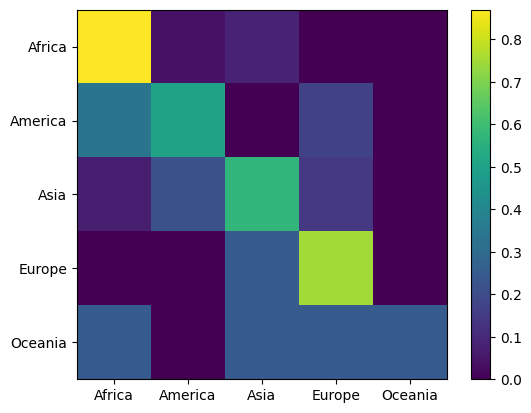

In [17]:
pp.imshow(confusion_matrix(z_test, tree_pred, normalize='true'))
pp.xticks(range(5), y.cat.categories); pp.yticks(range(5), y.cat.categories)
pp.colorbar();

In [18]:
forest = RandomForestClassifier()

In [19]:
forest.fit(x_train, z_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [20]:
forest_pred = forest.predict(x_test)

In [21]:
print(classification_report(z_test, forest_pred, target_names=y.cat.categories))

              precision    recall  f1-score   support

      Africa       0.91      0.87      0.89        23
     America       0.56      0.83      0.67         6
        Asia       0.50      0.50      0.50        14
      Europe       0.69      0.75      0.72        12
     Oceania       1.00      0.25      0.40         4

    accuracy                           0.71        59
   macro avg       0.73      0.64      0.64        59
weighted avg       0.74      0.71      0.71        59



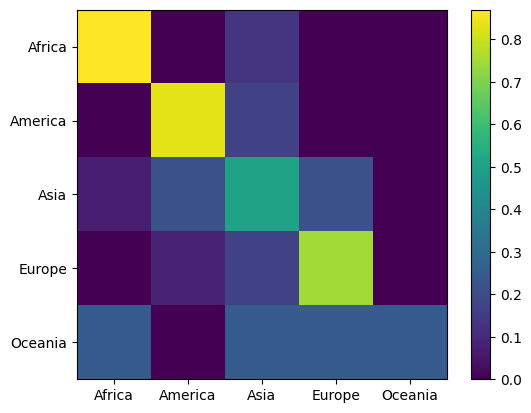

In [22]:
pp.imshow(confusion_matrix(z_test, forest_pred, normalize='true'))
pp.xticks(range(5), y.cat.categories); pp.yticks(range(5), y.cat.categories)
pp.colorbar();